# Setup Azure OpenAI

In [1]:
import os
from dotenv import load_dotenv
from openai import OpenAI

client = OpenAI(
    # defaults to os.environ.get("OPENAI_API_KEY")
    api_key=os.getenv("OPENAI_API_KEY"),
)



# Load Data. Note: openai==1.3.2


In [2]:
import os
from dotenv import load_dotenv
from openai import OpenAI

client = OpenAI(
    # defaults to os.environ.get("OPENAI_API_KEY")
    api_key=os.getenv("OPENAI_API_KEY"),         # I am using openAI API instead of Azure OpenAI
)
import pandas as pd

# Load data from local file
df_orig = pd.read_csv("c:/Users/yrui7/Documents/vscode/Week2/Homework/data/bbc/bbc-news-data.csv", delimiter='\t')
df = df_orig.copy()
df1=df.iloc[0:5] # only use the first 5 rows for testing
df1





,category,filename,title,content
0,business,001.txt,Ad sales boost Time Warner profit,Quarterly profits at US media giant TimeWarne...
1,business,002.txt,Dollar gains on Greenspan speech,The dollar has hit its highest level against ...
2,business,003.txt,Yukos unit buyer faces loan claim,The owners of embattled Russian oil giant Yuk...
3,business,004.txt,High fuel prices hit BA's profits,British Airways has blamed high fuel prices f...
4,business,005.txt,Pernod takeover talk lifts Domecq,Shares in UK drinks and food firm Allied Dome...


In [3]:
#solution 1
def generate_embedding(row):
    try:
        embedding = client.embeddings.create(input=row['content'], model="text-embedding-ada-002") 
        return embedding.data[0].embedding 
    except Exception as err:
        print(f"Error: {err}")
        return None  # Return None or a default value for rows where embedding generation fails

df1['embedding'] = df1.apply(lambda x: generate_embedding(x), axis=1)
df1

C:\Users\yrui7\AppData\Local\Temp\ipykernel_14136\861548214.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['embedding'] = df1.apply(lambda x: generate_embedding(x), axis=1)


,category,filename,title,content,embedding
0,business,001.txt,Ad sales boost Time Warner profit,Quarterly profits at US media giant TimeWarne...,"[-0.021114042028784752, -0.016946109011769295,..."
1,business,002.txt,Dollar gains on Greenspan speech,The dollar has hit its highest level against ...,"[-0.024624774232506752, -0.012992807663977146,..."
2,business,003.txt,Yukos unit buyer faces loan claim,The owners of embattled Russian oil giant Yuk...,"[-0.021628033369779587, -0.03692850470542908, ..."
3,business,004.txt,High fuel prices hit BA's profits,British Airways has blamed high fuel prices f...,"[-0.02182532660663128, -0.01672028936445713, -..."
4,business,005.txt,Pernod takeover talk lifts Domecq,Shares in UK drinks and food firm Allied Dome...,"[-0.008394770324230194, -0.00838801171630621, ..."


In [4]:
 #solution 2

def generate_embedding(row):
    try:
        embedding_response = client.embeddings.create(input=row['content'], model="text-embedding-ada-002")
        embedding_data = embedding_response.data  # Assuming 'data' holds the embeddings
        if embedding_data and len(embedding_data) > 0:
            return embedding_data[0].embedding  # Assuming 'embedding' is the field containing the actual embedding
        else:
            print("No embedding data found")
            return None
    except Exception as err:
        print(f"Error: {err}")
        return None  # Return None or a default value for rows where embedding generation fails

df1['embedding'] = df1.apply(lambda x: generate_embedding(x), axis=1)

df1




C:\Users\yrui7\AppData\Local\Temp\ipykernel_14136\1928264778.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['embedding'] = df1.apply(lambda x: generate_embedding(x), axis=1)


,category,filename,title,content,embedding
0,business,001.txt,Ad sales boost Time Warner profit,Quarterly profits at US media giant TimeWarne...,"[-0.021114042028784752, -0.016946109011769295,..."
1,business,002.txt,Dollar gains on Greenspan speech,The dollar has hit its highest level against ...,"[-0.024624774232506752, -0.012992807663977146,..."
2,business,003.txt,Yukos unit buyer faces loan claim,The owners of embattled Russian oil giant Yuk...,"[-0.021628033369779587, -0.03692850470542908, ..."
3,business,004.txt,High fuel prices hit BA's profits,British Airways has blamed high fuel prices f...,"[-0.021889586001634598, -0.01674591936171055, ..."
4,business,005.txt,Pernod takeover talk lifts Domecq,Shares in UK drinks and food firm Allied Dome...,"[-0.008367725647985935, -0.008401520550251007,..."


In [17]:
#solution 3
df1['embedding'] = ''

for i in range(min(5, len(df))):  # Only run 5 rows for demo purpose
    try:
        embedding = client.embeddings.create(input=df1['content'][i], model="text-embedding-ada-002")  
        df1['embedding'][i] = embedding.data[0].embedding 
    except Exception as err:
        print(f"Error: Index={i} {err=}, {type(err)=}")
        
df1
        

,category,filename,title,content,embedding
0,business,001.txt,Ad sales boost Time Warner profit,Quarterly profits at US media giant TimeWarne...,"[-0.021114042028784752, -0.016946109011769295,..."
1,business,002.txt,Dollar gains on Greenspan speech,The dollar has hit its highest level against ...,"[-0.024624774232506752, -0.012992807663977146,..."
2,business,003.txt,Yukos unit buyer faces loan claim,The owners of embattled Russian oil giant Yuk...,"[-0.021628033369779587, -0.03692850470542908, ..."
3,business,004.txt,High fuel prices hit BA's profits,British Airways has blamed high fuel prices f...,"[-0.02182532660663128, -0.01672028936445713, -..."
4,business,005.txt,Pernod takeover talk lifts Domecq,Shares in UK drinks and food firm Allied Dome...,"[-0.008394770324230194, -0.00838801171630621, ..."


# Load all embeddings

In this exercise, we have already process all the embeddings and saved into a file. Now we load embeddings for the rest of this exercise.

In [7]:
# Load small embeddings dataset
df = pd.read_csv("c:/Users/yrui7/Documents/vscode/Week2/Homework/data/bbc/bbc-news-data-embedding_small.csv", sep='\t')
df.iloc[0:5] 

,category,filename,title,content,word_count,embedding
0,business,001.txt,Ad sales boost Time Warner profit,Quarterly profits at US media giant TimeWarne...,415,"[-0.021155867725610733, -0.01682022027671337, ..."
1,business,002.txt,Dollar gains on Greenspan speech,The dollar has hit its highest level against ...,379,"[-0.02455304190516472, -0.012937315739691257, ..."
2,business,003.txt,Yukos unit buyer faces loan claim,The owners of embattled Russian oil giant Yuk...,258,"[-0.021608199924230576, -0.036890752613544464,..."
3,business,004.txt,High fuel prices hit BA's profits,British Airways has blamed high fuel prices f...,400,"[-0.02186358906328678, -0.016681300476193428, ..."
4,business,005.txt,Pernod takeover talk lifts Domecq,Shares in UK drinks and food firm Allied Dome...,260,"[-0.008347506634891033, -0.008401579223573208,..."


In [8]:
import numpy as np

# convert string to array
df["embedding"] = df['embedding'].apply(eval).apply(np.array)  

# Visualize embeddings


We are going to use PCA - Pricipal Component Analysis to reduce dimension to only 2 so we can visualize the 

In [10]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
vis_dims_pca = pca.fit_transform(df['embedding'].to_list())
vis_dims_pca.shape
# vis_dims_pca

df["vis_dims_pca"] = vis_dims_pca.tolist()

### Now we visualize the reduced data in 2D plot

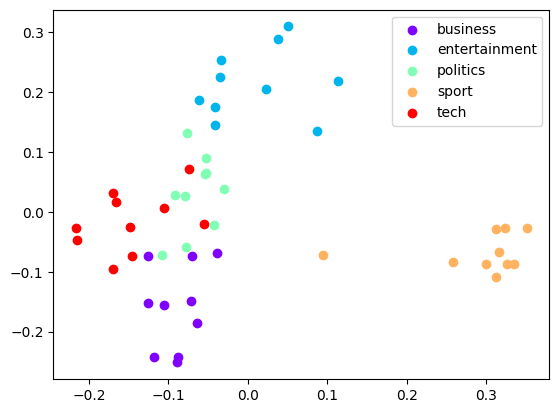

In [12]:
import matplotlib.pyplot as plt

df[['x', 'y']] = pd.DataFrame(df['vis_dims_pca'].to_list(), index=df.index)

# Create a scatter plot with colors determined by 'category'
categories = df['category'].unique()
colors = plt.cm.rainbow(np.linspace(0, 1, len(categories)))

for i, category in enumerate(categories):
    df_category = df[df['category'] == category]
    plt.scatter(df_category['x'], df_category['y'], color=colors[i], label=category)

plt.legend()
plt.show()

### Though experiment - What does this visualization represents?


# Classify news

Now, let's ignore the 'category' column and only use the 'content' column to train a classifier. The goal is to see if the classifier can predict the 'category' column based on the 'content' column.

By training this model, we demonstrate how embedding can be use for slightly different purposes rather than semantic retrieval.

Now we load and prepare the data:

In [13]:
# First, we need to split the data for training and testing purposes
from sklearn.model_selection import train_test_split

# Now, we load full dataset
df = pd.read_csv("c:/Users/yrui7/Documents/vscode/Week2/Homework/data/bbc/bbc-news-data-embedding_full.csv", sep='\t') 
# convert embedding column to array
df["embedding"] = df['embedding'].apply(eval).apply(np.array)


Next, we train the model

In [14]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['embedding'], df['category'], test_size=0.2, random_state=42)

# train KNN model
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train.to_list(), y_train.to_list())



KNeighborsClassifier()

Now we will use this model to predict the test data

In [15]:
# predict
y_pred = knn.predict(X_test.to_list())

Time to see how accurate our model is

In [16]:
from sklearn.metrics import classification_report, confusion_matrix
# Evaluating the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[108   0   5   0   2]
 [  2  68   0   0   2]
 [  0   0  75   0   1]
 [  1   0   0 101   0]
 [  1   2   2   0  75]]
               precision    recall  f1-score   support

     business       0.96      0.94      0.95       115
entertainment       0.97      0.94      0.96        72
     politics       0.91      0.99      0.95        76
        sport       1.00      0.99      1.00       102
         tech       0.94      0.94      0.94        80

     accuracy                           0.96       445
    macro avg       0.96      0.96      0.96       445
 weighted avg       0.96      0.96      0.96       445



Homework question #1: In this model, how many business news has been falsely identified as tech news?

Answer: 1

Homework question #2: Explain what does 0.96 precision mean for business class?

Answer: =108/(108+2+0+1+1). 108/112 have been correctly classified. 1 has been falsely classified as sport and 1 has been falsely classified as tech

Homework question #3: Explain what does 0.94 recall mean for tech?

Answer: =75/(1+2+2+0+75). Among the 80 tech that's been called, 75 of them are accurately classified. 1 business, 2 entertainment, 2 politics and 0 sport are falsely classified as tech.

Homework question #4: Find a case where we need to recall as metric to measure model performance?

Answer: in life-threatening or critical situations like medical diagnoses ( for example, covid-19 test), where missing positive instances (disease cases) is very costly (potential wide spreading of the virus), recall becomes a significant metric to ensure the model's ability to correctly identify all relevant cases, minimizing the chances of false negatives.
